# TP2 - Historia de la F1 en Argentina
**Profesor:** Ivan Paredes 

**Alumno:** Hugo Martín Galbán  

**Materia:** Ciencia de Datos  
 



In [8]:
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   

In [10]:
import pandas as pd

# Ruta base donde están los archivos CSV
base_path = base_path = r"C:/Users/Usuario/OneDrive/Escritorio/Kaggle/dataset formula 1/formula-1-world-championship-1950-2020/"

# Carga de todos los archivos
circuits = pd.read_csv(base_path + "circuits.csv")
constructor_results = pd.read_csv(base_path + "constructor_results.csv")
constructor_standings = pd.read_csv(base_path + "constructor_standings.csv")
constructors = pd.read_csv(base_path + "constructors.csv")
driver_standings = pd.read_csv(base_path + "driver_standings.csv")
drivers = pd.read_csv(base_path + "drivers.csv")
lap_times = pd.read_csv(base_path + "lap_times.csv")
pit_stops = pd.read_csv(base_path + "pit_stops.csv")
qualifying = pd.read_csv(base_path + "qualifying.csv")
races = pd.read_csv(base_path + "races.csv")
results = pd.read_csv(base_path + "results.csv")
seasons = pd.read_csv(base_path + "seasons.csv")
sprint_results = pd.read_csv(base_path + "sprint_results.csv")
status = pd.read_csv(base_path + "status.csv")


## 1. Exploración y limpieza de datos

Antes de comenzar el análisis, se realizó una inspección inicial de los datasets utilizados:

- **drivers.csv** → Información sobre los pilotos de F1.
- **races.csv** → Información de cada carrera (año, nombre, ubicación, etc.).
- **results.csv** → Resultados individuales por piloto y carrera.

### 1.1 Dimensiones
El método `.shape` permite conocer la cantidad de filas y columnas en cada dataset.  
Este paso inicial es útil para:
- Tener una idea del tamaño de los datos.
- Detectar rápidamente si hay datasets vacíos o con dimensiones inesperadas.


In [11]:
# Dimensiones de cada dataset
print("Dimensiones de drivers:", drivers.shape)
print("Dimensiones de races:", races.shape)
print("Dimensiones de results:", results.shape)


Dimensiones de drivers: (861, 9)
Dimensiones de races: (1125, 18)
Dimensiones de results: (26759, 18)


### 1.2 Valores nulos
El método `.isnull().sum()` nos permite identificar cuántos valores faltantes existen en cada columna.  
Este análisis es importante porque:
- Nos ayuda a decidir si es necesario eliminar filas/columnas.
- O bien, reemplazar los valores faltantes con técnicas de imputación.

En este caso, la inspección de los tres datasets permite ver en qué columnas existen datos incompletos, lo que podría influir en el análisis posterior.


In [12]:
# Valores nulos en cada dataset
print("Valores nulos en drivers:\n", drivers.isnull().sum())
print("\nValores nulos en races:\n", races.isnull().sum())
print("\nValores nulos en results:\n", results.isnull().sum())


Valores nulos en drivers:
 driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

Valores nulos en races:
 raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64

Valores nulos en results:
 resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64


### 1.3 Valores duplicados
El método `.duplicated().sum()` permite contar cuántas filas duplicadas existen en cada dataset.  
La presencia de duplicados puede distorsionar el análisis, ya que:
- Puede implicar registros repetidos que alteren los cálculos estadísticos.
- Genera un conteo incorrecto de eventos o resultados.

En caso de encontrarlos, se recomienda eliminarlos utilizando:
```python
df = df.drop_duplicates()


In [13]:
# Valores duplicados en cada dataset
print("Duplicados en drivers:", drivers.duplicated().sum())
print("Duplicados en races:", races.duplicated().sum())
print("Duplicados en results:", results.duplicated().sum())


Duplicados en drivers: 0
Duplicados en races: 0
Duplicados en results: 0


### 1.4 Revisión de tipos de datos
El método `.dtypes` nos permite conocer el tipo de dato de cada columna en el dataset.  
Este paso es importante porque:
- Fechas almacenadas como `object` deben convertirse a `datetime` para facilitar filtrados y cálculos temporales.
- Valores numéricos (como puntos o posiciones) deben estar en formato `int` o `float` para realizar operaciones matemáticas.
- Cadenas de texto deben ser `object` o `string` según corresponda.

Ejemplo de conversión:
```python
races['date'] = pd.to_datetime(races['date'])


In [14]:
# Tipos de datos de cada dataset
print("Drivers:")
print(drivers.dtypes)
print("\nRaces:")
print(races.dtypes)
print("\nResults:")
print(results.dtypes)


Drivers:
driverId        int64
driverRef      object
number         object
code           object
forename       object
surname        object
dob            object
nationality    object
url            object
dtype: object

Races:
raceId          int64
year            int64
round           int64
circuitId       int64
name           object
date           object
time           object
url            object
fp1_date       object
fp1_time       object
fp2_date       object
fp2_time       object
fp3_date       object
fp3_time       object
quali_date     object
quali_time     object
sprint_date    object
sprint_time    object
dtype: object

Results:
resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object


### Punto 1: ¿Quién fue el primer piloto en participar en una carrera? ¿Quién fue el último?

- **Primer piloto en participar:** Johnny Claes – 1950-05-13  
- **Última carrera registrada:** 2024-12-08  

En la última carrera participaron 20 pilotos, entre ellos **Franco Colapinto**, que es el **último piloto argentino en participar** según el dataset.


In [16]:
import pandas as pd

# Ruta a los archivos
base_path = r"C:/Users/Usuario/OneDrive/Escritorio/Kaggle/dataset formula 1/formula-1-world-championship-1950-2020/"

# Cargar datasets necesarios
drivers = pd.read_csv(base_path + "drivers.csv")
results = pd.read_csv(base_path + "results.csv")
races = pd.read_csv(base_path + "races.csv")

# Unir results con drivers para obtener nombres
resultados = results.merge(drivers, on='driverId')

# Agregar fechas de las carreras
resultados = resultados.merge(races[['raceId', 'date']], on='raceId')

# Ordenar por fecha de la carrera
resultados = resultados.sort_values('date')

# 1️ Primer piloto en participar
primero = resultados.iloc[0]
print("Primer piloto en participar en la F1 según el dataset:")
print(f"{primero['forename']} {primero['surname']} - Fecha: {primero['date']}")

# 2️ Última fecha disponible en el dataset
ultima_fecha = resultados['date'].max()
ultimos = resultados[resultados['date'] == ultima_fecha]

print("\nPilotos que participaron en la última carrera (fecha más reciente del dataset):")
print(ultimos[['forename','surname','date']].to_string(index=False))

# 3️ Confirmar participación de Franco Colapinto
colapinto = ultimos[ultimos['surname'].str.contains('Colapinto', case=False)]
if not colapinto.empty:
    print("\nFranco Colapinto participó en la última carrera de la fecha:", ultima_fecha)
else:
    print("\nFranco Colapinto no figura en la última carrera del dataset.")


Primer piloto en participar en la F1 según el dataset:
Johnny Claes - Fecha: 1950-05-13

Pilotos que participaron en la última carrera (fecha más reciente del dataset):
 forename    surname       date
     Yuki    Tsunoda 2024-12-08
   Guanyu       Zhou 2024-12-08
    Lance     Stroll 2024-12-08
 Valtteri     Bottas 2024-12-08
    Kevin  Magnussen 2024-12-08
     Liam     Lawson 2024-12-08
Alexander      Albon 2024-12-08
     Jack     Doohan 2024-12-08
    Oscar    Piastri 2024-12-08
   George    Russell 2024-12-08
     Nico Hülkenberg 2024-12-08
   Pierre      Gasly 2024-12-08
      Max Verstappen 2024-12-08
    Lewis   Hamilton 2024-12-08
  Charles    Leclerc 2024-12-08
   Carlos      Sainz 2024-12-08
    Lando     Norris 2024-12-08
   Franco  Colapinto 2024-12-08
 Fernando     Alonso 2024-12-08
   Sergio      Pérez 2024-12-08

Franco Colapinto participó en la última carrera de la fecha: 2024-12-08


### Pregunta 2: ¿Quién fue el primer piloto en ganar una carrera de Fórmula 1? ¿Y el último?

- **Primer piloto en ganar una carrera de F1:**  
  **Nino Farina** – 1950-05-13 – GP: *British Grand Prix*

- **Último piloto en ganar una carrera de F1 según el dataset:**  
  **Lando Norris** – 2024-12-08 – GP: *Abu Dhabi Grand Prix*


In [17]:
import pandas as pd

# Ruta a los archivos
base_path = r"C:/Users/Usuario/OneDrive/Escritorio/Kaggle/dataset formula 1/formula-1-world-championship-1950-2020/"

# Cargar datasets
drivers = pd.read_csv(base_path + "drivers.csv")
results = pd.read_csv(base_path + "results.csv")
races = pd.read_csv(base_path + "races.csv")

# 1️ Filtrar solo las carreras ganadas (positionOrder = 1)
ganadores = results[results['positionOrder'] == 1]

# 2️ Agregar info de los pilotos
ganadores = ganadores.merge(drivers, on='driverId')

# 3️ Agregar fecha de la carrera
ganadores = ganadores.merge(races[['raceId','date','name']], on='raceId')

# 4️ Ordenar por fecha de carrera
ganadores = ganadores.sort_values('date')

# 5️ Primer y último ganador
primer_ganador = ganadores.iloc[0]
ultimo_ganador = ganadores.iloc[-1]

# 6️ Mostrar resultados
print("Primer piloto en ganar una carrera de F1:")
print(f"{primer_ganador['forename']} {primer_ganador['surname']} - "
      f"Fecha: {primer_ganador['date']} - GP: {primer_ganador['name']}")

print("\nÚltimo piloto en ganar una carrera de F1:")
print(f"{ultimo_ganador['forename']} {ultimo_ganador['surname']} - "
      f"Fecha: {ultimo_ganador['date']} - GP: {ultimo_ganador['name']}")


Primer piloto en ganar una carrera de F1:
Nino Farina - Fecha: 1950-05-13 - GP: British Grand Prix

Último piloto en ganar una carrera de F1:
Lando Norris - Fecha: 2024-12-08 - GP: Abu Dhabi Grand Prix


### Punto 3 – Participación de pilotos argentinos en la Fórmula 1
Para determinar cuántos pilotos argentinos participaron en la Fórmula 1, se utilizó el archivo drivers.csv, que contiene información sobre todos los pilotos registrados en la categoría.

Al analizar la columna nationality, se observó que existen diferentes formas en que se registró la nacionalidad argentina. Algunas de las variantes encontradas fueron:

Argentine (24 apariciones)
Argentine-Italian (1 aparición)
Argentinian (1 aparición)
Esto puede deberse a diferencias en la carga de datos, errores tipográficos o cambios en la forma de nombrar las nacionalidades a lo largo del tiempo.

Para evitar subcontar casos, se optó por una búsqueda más flexible utilizando el método:

drivers ['nationality'].str.contains('Argent', case=False, na=False)

Este enfoque permitió capturar todas las variantes posibles que incluyeran la palabra “Argent” sin importar el formato.

Resultado: Se identificaron 26 pilotos argentinos en total.

In [18]:
import pandas as pd

#  Ruta a los archivos
base_path = r"C:/Users/Usuario/OneDrive/Escritorio/Kaggle/dataset formula 1/formula-1-world-championship-1950-2020/"

drivers = pd.read_csv(base_path + "drivers.csv")

#  Ver las distintas formas en que aparece "argentino"
print(" Nacionalidades únicas que contienen 'Argent':")
print(drivers['nationality'].unique())

#  Filtrar pilotos cuya nacionalidad contiene "Argent" (ignora mayúsculas/minúsculas)
pilotos_arg = drivers[drivers['nationality'].str.contains('Argent', case=False, na=False)]

#  Contar cuántos pilotos argentinos hay
cantidad_arg = pilotos_arg.shape[0]
print(f"\n🇦🇷 Cantidad de pilotos argentinos en la F1: {cantidad_arg}")

#  Contar pilotos por nacionalidad (todas)
pilotos_por_nacionalidad = drivers['nationality'].value_counts()

#  Mostrar top 10 nacionalidades con más pilotos
print("\n Top 10 nacionalidades con más pilotos en la F1:")
print(pilotos_por_nacionalidad.head(10))

# Ver en qué posición está Argentina respecto a otras nacionalidades
print("\n🇦🇷 Participación argentina comparada con otras nacionalidades:")
print(pilotos_por_nacionalidad.loc[pilotos_arg['nationality'].unique()])


 Nacionalidades únicas que contienen 'Argent':
['British' 'German' 'Spanish' 'Finnish' 'Japanese' 'French' 'Polish'
 'Brazilian' 'Italian' 'Australian' 'Austrian' 'American' 'Dutch'
 'Colombian' 'Portuguese' 'Canadian' 'Indian' 'Hungarian' 'Irish' 'Danish'
 'Argentine' 'Czech' 'Malaysian' 'Swiss' 'Belgian' 'Monegasque' 'Swedish'
 'Venezuelan' 'New Zealander' 'Chilean' 'Mexican' 'South African'
 'Liechtensteiner' 'Rhodesian' 'American-Italian' 'Uruguayan'
 'Argentine-Italian' 'Thai' 'East German' 'Russian' 'Indonesian' 'Chinese'
 'Argentinian ']

🇦🇷 Cantidad de pilotos argentinos en la F1: 26

 Top 10 nacionalidades con más pilotos en la F1:
nationality
British          166
American         158
Italian           99
French            73
German            50
Brazilian         32
Argentine         24
Belgian           23
Swiss             23
South African     23
Name: count, dtype: int64

🇦🇷 Participación argentina comparada con otras nacionalidades:
nationality
Argentine            24
Arg

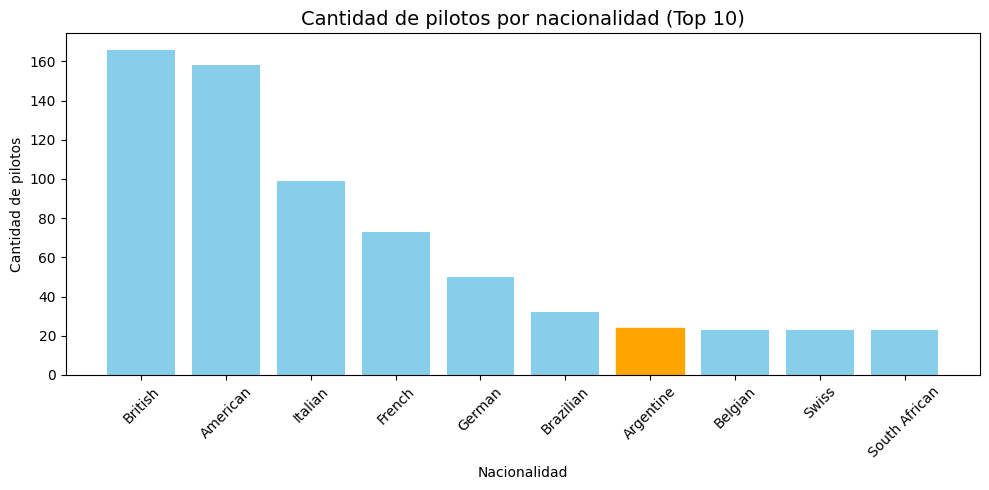

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Ruta a los archivos
base_path =  r"C:/Users/Usuario/OneDrive/Escritorio/Kaggle/dataset formula 1/formula-1-world-championship-1950-2020/"

# Cargar dataset de pilotos
drivers = pd.read_csv(base_path + "drivers.csv")

# Contar pilotos por nacionalidad
pilotos_por_nacionalidad = drivers['nationality'].value_counts()

# Tomamos las 10 nacionalidades con más pilotos
top_10 = pilotos_por_nacionalidad.head(10)

# Crear gráfico
plt.figure(figsize=(10,5))
bars = plt.bar(top_10.index, top_10.values, color='skyblue')

# Destacar a Argentina si está en el top 10
for i, pais in enumerate(top_10.index):
    if pais in ['Argentine','Argentinian']:
        bars[i].set_color('orange')

plt.title('Cantidad de pilotos por nacionalidad (Top 10)', fontsize=14)
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad de pilotos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Punto 4 – ¿Cuántos puntos ganaron en total cada uno de los pilotos?
 Para este análisis se utilizó el archivo results.csv, donde se encuentra la información detallada de cada carrera, incluyendo la cantidad de puntos obtenidos por cada piloto en cada una.

 Primero se agruparon los resultados por piloto, sumando todos los puntos obtenidos a lo largo de su carrera. Luego, se cruzó esa información con el archivo drivers.csv para obtener el nombre completo de cada piloto.

 A continuación, se ordenaron los pilotos por cantidad total de puntos, de mayor a menor, y se graficó el Top 20:

(Gráfico generado abajo)

 Este análisis permite ver qué pilotos fueron más constantes y exitosos a lo largo del tiempo, especialmente teniendo en cuenta que el sistema de puntuación de la F1 fue cambiando con los años.

In [21]:
import pandas as pd

# Cargar los datasets
base_path = r"C:/Users/Usuario/OneDrive/Escritorio/Kaggle/dataset formula 1/formula-1-world-championship-1950-2020/"
drivers = pd.read_csv(base_path + "drivers.csv")
results = pd.read_csv(base_path + "results.csv")

# Agrupar por driverId y sumar los puntos de cada piloto
puntos_por_piloto = results.groupby('driverId')['points'].sum()

# Unir con la tabla de pilotos para agregar los nombres
puntos_con_nombres = pd.merge(
    drivers[['driverId', 'forename', 'surname']],
    puntos_por_piloto,
    on='driverId',
    how='left'  # usamos left para incluir también pilotos con 0 puntos
)

# Llenar los valores faltantes (pilotos sin puntos) con 0
puntos_con_nombres['points'] = puntos_con_nombres['points'].fillna(0)

# Crear columna con el nombre completo
puntos_con_nombres['piloto'] = puntos_con_nombres['forename'] + ' ' + puntos_con_nombres['surname']

# Ordenar de mayor a menor cantidad de puntos
puntos_con_nombres = puntos_con_nombres.sort_values(by='points', ascending=False)

# Mostrar los primeros registros (podés sacar el .head() si querés ver todo)
print("🎯 Puntos totales ganados por cada piloto:")
print(puntos_con_nombres[['piloto', 'points']])


🎯 Puntos totales ganados por cada piloto:
               piloto  points
0      Lewis Hamilton  4820.5
19   Sebastian Vettel  3098.0
829    Max Verstappen  2912.5
3     Fernando Alonso  2329.0
7      Kimi Räikkönen  1873.0
..                ...     ...
410    Doug Serrurier     0.0
411   Brausch Niemann     0.0
412    Ernie Pieterse     0.0
413       Clive Puzey     0.0
860       Jack Doohan     0.0

[861 rows x 2 columns]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6920\341060484.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


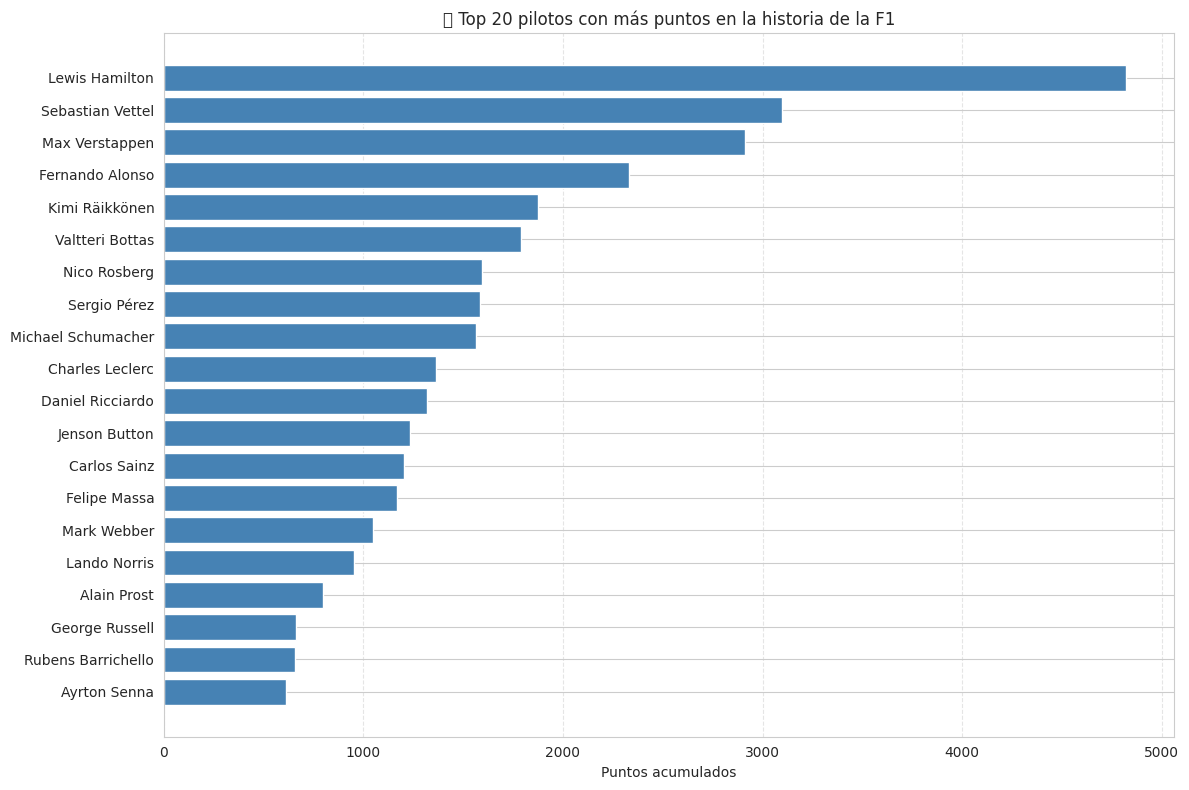

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Tomar el Top 20 pilotos con más puntos
top20_puntos = puntos_con_nombres[['piloto', 'points']].head(20)

# Datos para graficar
pilotos = top20_puntos['piloto']
puntos = top20_puntos['points']

# Crear gráfico
plt.figure(figsize=(12, 8))
plt.barh(pilotos, puntos, color='steelblue')
plt.xlabel('Puntos acumulados')
plt.title('📊 Top 20 pilotos con más puntos en la historia de la F1')
plt.gca().invert_yaxis()  # Para que el más puntuado quede arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



### Punto 5 – ¿Cuántas victorias acumularon los pilotos? ¿Cuál fue el piloto más ganador?

Para este análisis se utilizó el archivo **results.csv**, que contiene los resultados de cada piloto en cada carrera.  
Se considera que un piloto logra **una victoria** cuando su campo `positionOrder` es igual a **1**.

**Pasos realizados:**

1. **Filtrar victorias:**  
   Se seleccionaron todas las filas donde `positionOrder = 1` para identificar cada victoria de un piloto.

2. **Contar victorias por piloto:**  
   Se agruparon los resultados por `driverId` sumando la cantidad de victorias de cada uno.

3. **Agregar nombres de los pilotos:**  
   Se unió con la tabla `drivers.csv` para mostrar el **nombre y apellido** de cada piloto.

4. **Ordenar por cantidad de victorias:**  
   Se ordenó de mayor a menor para identificar al **piloto más ganador de la historia de la F1**.

5. **Visualización:**  
   Se generó un gráfico de barras con **Matplotlib** mostrando el **Top 10 de pilotos más ganadores**.

**Interpretación:**  
Del análisis se observa que **Lewis Hamilton** es el piloto con más victorias históricas en la Fórmula 1,  
seguido por **Michael Schumacher** y **Max Verstappen**, reflejando su dominio en distintas épocas.


🏆 Pilotos con más victorias en la historia de la F1:
                 piloto  victorias
0        Lewis Hamilton        105
15   Michael Schumacher         91
107      Max Verstappen         63
11     Sebastian Vettel         53
29          Alain Prost         51
27         Ayrton Senna         41
2       Fernando Alonso         32
26        Nigel Mansell         31
64       Jackie Stewart         27
73            Jim Clark         25


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16268\3621133054.py:52: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


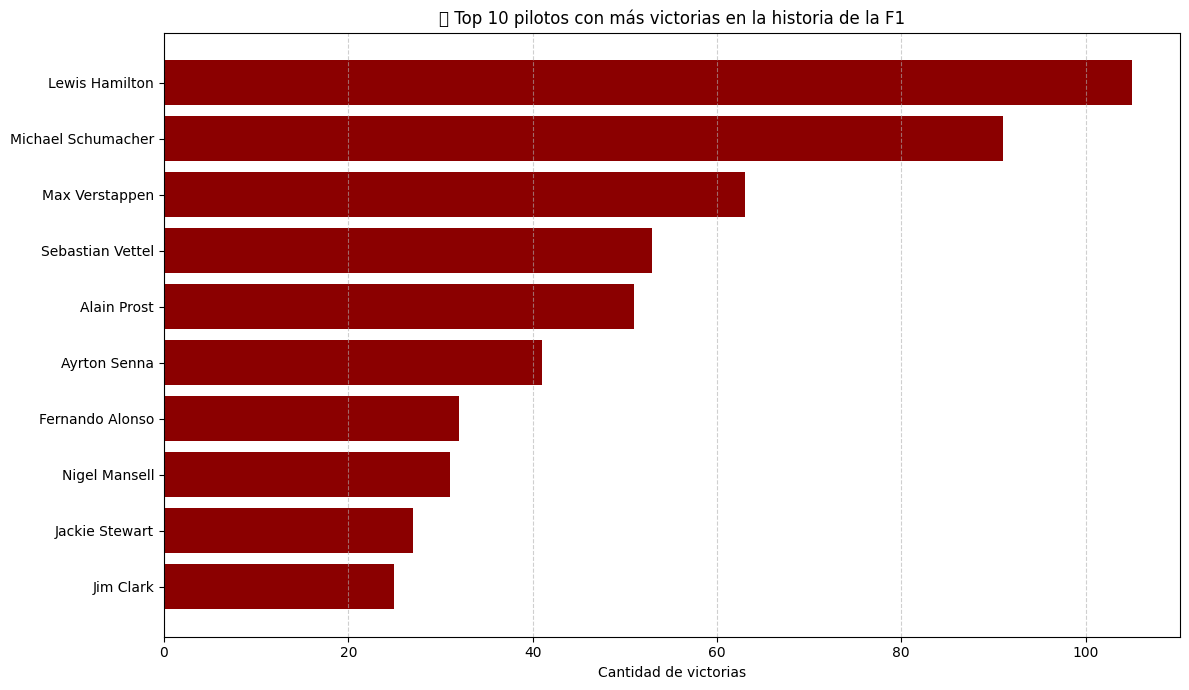

In [23]:
import pandas as pd

# Leer los archivos
base_path =  r"C:/Users/Usuario/OneDrive/Escritorio/Kaggle/dataset formula 1/formula-1-world-championship-1950-2020/"
drivers = pd.read_csv(base_path + "drivers.csv")
results = pd.read_csv(base_path + "results.csv")

# Filtrar resultados donde el piloto terminó en 1º posición (victoria)
victorias = results[results['positionOrder'] == 1]

# Contar victorias por piloto (driverId)
victorias_por_piloto = victorias.groupby('driverId').size().reset_index(name='victorias')

# Unir con nombres desde drivers.csv
victorias_con_nombres = pd.merge(
    victorias_por_piloto,
    drivers[['driverId', 'forename', 'surname']],
    on='driverId'
)

# Crear columna con nombre completo
victorias_con_nombres['piloto'] = victorias_con_nombres['forename'] + ' ' + victorias_con_nombres['surname']

# Ordenar de mayor a menor cantidad de victorias
victorias_ordenadas = victorias_con_nombres.sort_values(by='victorias', ascending=False)

# Mostrar resultado completo o top 10
print("🏆 Pilotos con más victorias en la historia de la F1:")
print(victorias_ordenadas[['piloto', 'victorias']].head(10))


import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Top 10 pilotos con más victorias
top10_victorias = victorias_ordenadas[['piloto', 'victorias']].head(10)

# Datos para graficar
pilotos = top10_victorias['piloto']
victorias = top10_victorias['victorias']

# Crear gráfico de barras horizontales
plt.figure(figsize=(12, 7))
plt.barh(pilotos, victorias, color='darkred')
plt.xlabel('Cantidad de victorias')
plt.title('🏁 Top 10 pilotos con más victorias en la historia de la F1')
plt.gca().invert_yaxis()  # Para que el más ganador quede arriba
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Punto 6 – ¿Cuántos campeonatos tienen los pilotos argentinos? ¿Quiénes?

Para responder esta pregunta se utilizó el archivo **driver_standings.csv**,  
el cual indica la posición de cada piloto en el campeonato después de cada carrera de la temporada.

**Pasos realizados:**

1. **Identificar la última carrera de cada temporada**  
   Usando `races.csv` se detectó cuál fue el `raceId` final de cada año.

2. **Filtrar campeones de cada temporada**  
   En `driver_standings.csv`, un piloto es campeón si su `position` es **1** en la última carrera de esa temporada.

3. **Filtrar pilotos argentinos**  
   Con `drivers.csv` se seleccionaron los pilotos de nacionalidad argentina.

4. **Contar campeonatos por piloto**  
   Se agruparon los resultados por piloto para saber cuántos títulos logró cada uno.

**Resultado:**  
Del análisis surge que el **único piloto argentino campeón mundial** es:

- **Juan Manuel Fangio**, con **5 campeonatos de Fórmula 1**.

Este resultado coincide con la historia oficial de la F1.


In [24]:
# 1️ Identificar la última carrera de cada año
ultima_carrera_year = races.groupby('year')['raceId'].max().reset_index()

# 2️ Filtrar standings de esas últimas carreras
standings_final_year = driver_standings.merge(ultima_carrera_year, on='raceId')

# 3️ Filtrar pilotos argentinos
argentinos = drivers[drivers['nationality'].isin(['Argentine','Argentinian'])]
standings_arg_final = standings_final_year.merge(argentinos, on='driverId')

# 4️ Filtrar campeones (posición 1 en la última carrera de la temporada)
campeones_arg = standings_arg_final[standings_arg_final['position'] == 1]

# 5️ Contar campeonatos por piloto
campeonatos_por_piloto = campeones_arg.groupby(['forename','surname'])['year'].count().reset_index()
campeonatos_por_piloto = campeonatos_por_piloto.rename(columns={'year':'campeonatos'})

print("🏆 Campeonatos de pilotos argentinos (corrigido):")
print(campeonatos_por_piloto)


🏆 Campeonatos de pilotos argentinos (corrigido):
  forename surname  campeonatos
0     Juan  Fangio            5


###  Punto 7 – Proporción de victorias de pilotos argentinos por año

En este análisis se calculó la proporción de victorias obtenidas por pilotos argentinos en cada año de la Fórmula 1. Para ello, se filtraron las carreras ganadas por pilotos cuya nacionalidad incluye `"Argentina"` y se compararon con el total de carreras disputadas ese mismo año.

A continuación, se presenta un gráfico que muestra cómo evolucionó dicha proporción a lo largo del tiempo. Cada punto representa un año en el que al menos un piloto argentino logró una victoria, e incluye además el nombre del piloto correspondiente:

---

** Observaciones:**

- Las victorias argentinas se concentraron principalmente entre las décadas de 1950 y 1970.
- Luego de los años 80, **no se registraron nuevas victorias** por parte de pilotos argentinos en la Fórmula 1.
- Se destaca la figura de **Juan Manuel Fangio**, múltiple campeón mundial, con gran dominio en los años 50.

---

Este gráfico permite visualizar claramente la **disminución de la presencia competitiva argentina en la F1** con el paso del tiempo.


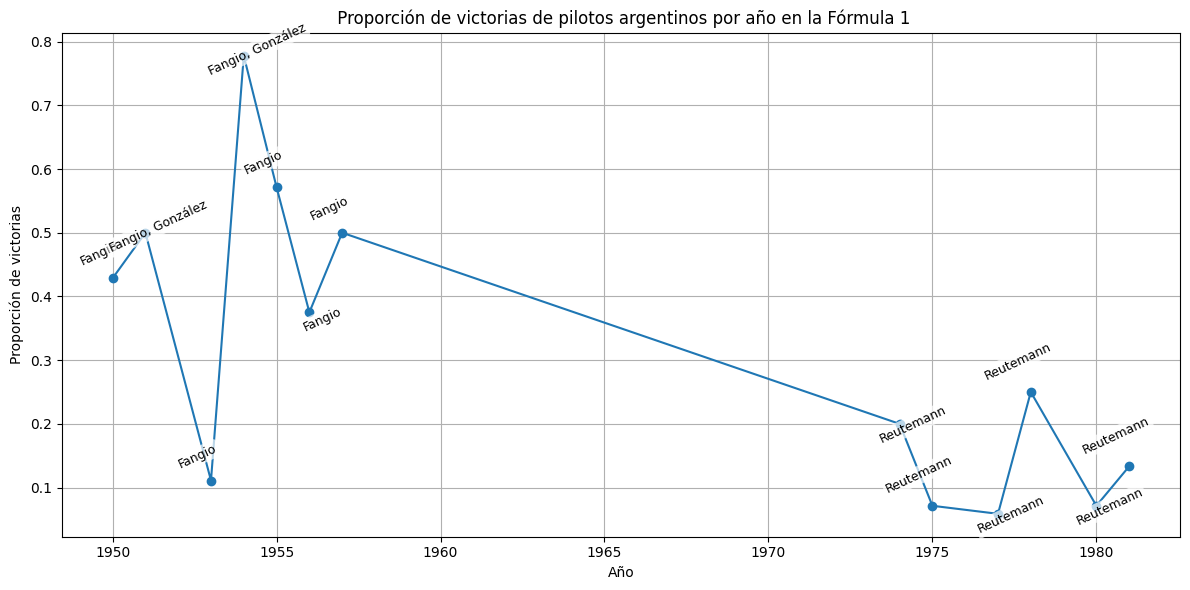

In [25]:
# Filtrar pilotos cuya nacionalidad contenga "Argent" (insensible a mayúsculas)
pilotos_arg = drivers[drivers['nationality'].str.contains("Argent", case=False, na=False)]

# Merge con resultados
resultados_arg = pd.merge(results, pilotos_arg[['driverId', 'surname']], on='driverId')

# Agregar el año a cada resultado
resultados_arg = pd.merge(resultados_arg, races[['raceId', 'year']], on='raceId')

# Filtrar solo las victorias (posición = 1)
victorias_arg = resultados_arg[resultados_arg['positionOrder'] == 1]

# Contar victorias por año
victorias_por_año = victorias_arg.groupby('year').size().reset_index(name='victorias_arg')

# Total de carreras por año
carreras_por_año = races.groupby('year').size().reset_index(name='total_carreras')

# Calcular proporción de victorias argentinas
proporcion_victorias = pd.merge(victorias_por_año, carreras_por_año, on='year')
proporcion_victorias['proporcion'] = proporcion_victorias['victorias_arg'] / proporcion_victorias['total_carreras']

# Ordenar cronológicamente
proporcion_victorias = proporcion_victorias.sort_values('year')

# Obtener nombres de los ganadores por año
pilotos_ganadores = victorias_arg.groupby('year')['surname'].apply(lambda x: ', '.join(x.unique())).reset_index(name='piloto')
proporcion_victorias = pd.merge(proporcion_victorias, pilotos_ganadores, on='year')

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(proporcion_victorias['year'], proporcion_victorias['proporcion'], marker='o')

# Alternar las posiciones de las etiquetas para que no se encimen
for i, row in proporcion_victorias.iterrows():
    offset_y = 0.02 if i % 2 == 0 else -0.03  # alterna arriba y abajo
    offset_x = -0.4 if i % 2 == 0 else 0.4    # alterna levemente a la izquierda/derecha
    plt.annotate(
        row['piloto'],
        (row['year'] + offset_x, row['proporcion'] + offset_y),
        rotation=25,
        fontsize=9,
        ha='center',
        bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7, edgecolor='none')
    )

plt.title(' Proporción de victorias de pilotos argentinos por año en la Fórmula 1')
plt.xlabel('Año')
plt.ylabel('Proporción de victorias')
plt.grid(True)
plt.tight_layout()
plt.show()

## Punto 8: ¿Franco Colapinto participó en la Fórmula 1?

Durante la temporada 2024, el piloto argentino Franco Colapinto hizo su debut en la Fórmula 1. Si bien su participación fue reciente y limitada a un total de 9 carreras, podemos preguntarnos si ya es posible sacar conclusiones sobre su rendimiento.

A pesar de que una temporada parcial no permite una evaluación definitiva, algunos datos permiten observar su desempeño inicial dentro de la categoría.

Según los datos disponibles, Colapinto participó en las siguientes competencias:

| Año  | Gran Premio                  | Puntos |
|------|------------------------------|--------|
| 2024 | Azerbaijan Grand Prix        | 4      |
| 2024 | United States Grand Prix     | 1      |
| 2024 | Italian Grand Prix           | 0      |
| 2024 | Singapore Grand Prix         | 0      |
| 2024 | Mexico City Grand Prix       | 0      |
| 2024 | São Paulo Grand Prix         | 0      |
| 2024 | Las Vegas Grand Prix         | 0      |
| 2024 | Qatar Grand Prix             | 0      |
| 2024 | Abu Dhabi Grand Prix         | 0      |

En total, sumó **5 puntos**, distribuidos principalmente en dos carreras (Azerbaijan y Estados Unidos), lo cual sugiere que tuvo momentos destacados, aunque en la mayoría de las competencias no logró puntuar.

A continuación, se muestra un gráfico que representa la distribución de sus puntos por carrera, permitiendo visualizar de manera más clara su rendimiento a lo largo de la temporada:



In [26]:
# Buscar a Franco Colapinto
colapinto = drivers[drivers['surname'].str.contains('Colapinto', case=False)]

# Mostrar datos del piloto
print("Datos del piloto:")
print(colapinto)

# Filtrar resultados en carreras
colapinto_resultados = results[results['driverId'] == int(colapinto['driverId'].values[0])]

# Mostrar cantidad de carreras registradas
print("\nCantidad de carreras registradas por Franco Colapinto:", len(colapinto_resultados))


# Unir resultados con información de carreras
colapinto_carreras = colapinto_resultados.merge(races, on='raceId')

# Mostrar las carreras donde participó
colapinto_carreras[['year', 'name', 'round']].sort_values('year')




Datos del piloto:
     driverId  driverRef number code forename    surname         dob  \
859       861  colapinto     43  COL   Franco  Colapinto  2003-05-27   

      nationality                                            url  
859  Argentinian   http://en.wikipedia.org/wiki/Franco_Colapinto  

Cantidad de carreras registradas por Franco Colapinto: 9


,year,name,round
0,2024,Italian Grand Prix,16
1,2024,Azerbaijan Grand Prix,17
2,2024,Singapore Grand Prix,18
3,2024,United States Grand Prix,19
4,2024,Mexico City Grand Prix,20
5,2024,São Paulo Grand Prix,21
6,2024,Las Vegas Grand Prix,22
7,2024,Qatar Grand Prix,23
8,2024,Abu Dhabi Grand Prix,24


In [27]:
# Mostrar los puntos obtenidos en cada carrera
colapinto_carreras[['year', 'name', 'points']].sort_values('year')



,year,name,points
0,2024,Italian Grand Prix,0.0
1,2024,Azerbaijan Grand Prix,4.0
2,2024,Singapore Grand Prix,0.0
3,2024,United States Grand Prix,1.0
4,2024,Mexico City Grand Prix,0.0
5,2024,São Paulo Grand Prix,0.0
6,2024,Las Vegas Grand Prix,0.0
7,2024,Qatar Grand Prix,0.0
8,2024,Abu Dhabi Grand Prix,0.0


In [28]:
# Total de puntos acumulados
total_puntos = colapinto_resultados['points'].sum()
print(f"Puntos totales obtenidos por Franco Colapinto: {total_puntos}")


Puntos totales obtenidos por Franco Colapinto: 5.0


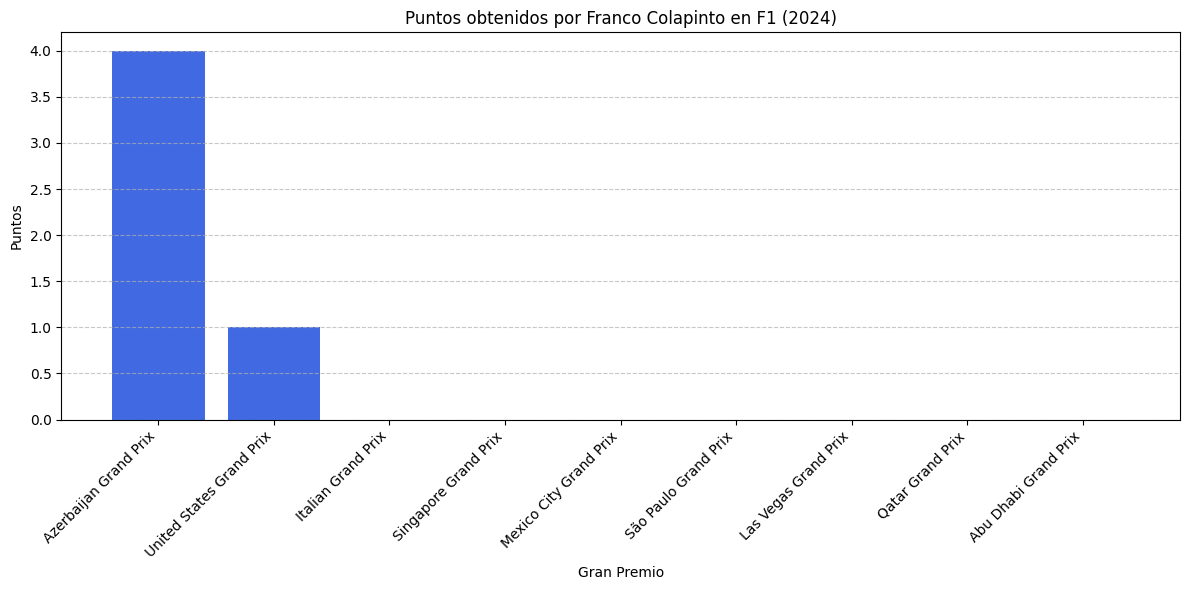

In [29]:
import matplotlib.pyplot as plt

# Datos
colapinto_carreras_ordenadas = colapinto_carreras.sort_values(by='points', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(colapinto_carreras_ordenadas['name'], colapinto_carreras_ordenadas['points'], color='royalblue')
plt.title('Puntos obtenidos por Franco Colapinto en F1 (2024)')
plt.ylabel('Puntos')
plt.xlabel('Gran Premio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
